# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
Наша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

Путь к файлу: '/datasets/real_estate_data.csv'

Описание данных:
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

Исследование пройдёт в несколько этапов:
 1. Обзор данных.
 2. Предобработка данных.
 3. Добавление новых столбцов.
 4. Исследовательский анализ данных.
 5. Общий вывод.

## Обзор данных. 

### Загрузим данные из файла в датафрейм.

In [1]:
# импорт нужных библиотек 
import matplotlib.pyplot as plt
import pandas as pd

# Прочитаем файл, указав в качестве разделителя знак табуляции \t, и сохраним результат в датафрейме
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 

### Изучим общую информацию о полученном датафрейме.

In [2]:
# основная информация о датафрейме
df.info() 
# первые 10 строк
display(df.head(10))
# последние 10 строк
display(df.tail(10))

# количество уникальных значений каждого столбца
for col in df.columns:
    display(df[col].value_counts())
    
# список характерных значений каждого столбца
for col in df.columns:
    display(df[col].describe()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
4      986
14     986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
29       3
50       3
27       2
35       2
30       2
31       2
39       1
25       1
42       1
37       1
Name: total_images, dtype: int64

4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
10430000.0      1
9917600.0       1
3180500.0       1
7297000.0       1
4386000.0       1
Name: last_price, Length: 2978, dtype: int64

45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
44.24       1
56.85       1
37.92       1
115.60      1
55.06       1
Name: total_area, Length: 2182, dtype: int64

2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111
2018-03-26T00:00:00     97
                      ... 
2015-06-14T00:00:00      1
2014-12-17T00:00:00      1
2018-05-01T00:00:00      1
2016-09-12T00:00:00      1
2015-03-02T00:00:00      1
Name: first_day_exposition, Length: 1491, dtype: int64

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64

18.00    882
17.00    675
30.00    598
16.00    486
20.00    481
        ... 
96.40      1
50.26      1
43.81      1
54.43      1
16.74      1
Name: living_area, Length: 1782, dtype: int64

2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
29       1
32       1
30       1
33       1
31       1
Name: floor, dtype: int64

False    2725
True       50
Name: is_apartment, dtype: int64

False    23550
True       149
Name: studio, dtype: int64

False    23632
True        67
Name: open_plan, dtype: int64

6.00     1300
10.00    1262
8.00     1110
9.00     1101
7.00     1062
         ... 
7.12        1
13.73       1
14.74       1
53.10       1
16.74       1
Name: kitchen_area, Length: 971, dtype: int64

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Санкт-Петербург           15721
посёлок Мурино              522
посёлок Шушары              440
Всеволожск                  398
Пушкин                      369
                          ...  
посёлок Петро-Славянка        1
деревня Раздолье              1
поселок Красносельское        1
деревня Нижняя                1
поселок Перово                1
Name: locality_name, Length: 364, dtype: int64

37434.0    61
21928.0    32
39946.0    30
44870.0    30
18732.0    27
           ..
53478.0     1
20335.0     1
33699.0     1
26945.0     1
20875.0     1
Name: airports_nearest, Length: 8275, dtype: int64

8460.0     61
20802.0    32
10720.0    30
8434.0     27
20444.0    27
           ..
5278.0      1
11575.0     1
3205.0      1
12747.0     1
4234.0      1
Name: cityCenters_nearest, Length: 7642, dtype: int64

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

441.0     67
392.0     41
173.0     41
456.0     40
471.0     32
          ..
2489.0     1
786.0      1
793.0      1
92.0       1
929.0      1
Name: parks_nearest, Length: 995, dtype: int64

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

427.0     70
454.0     41
153.0     40
433.0     39
564.0     37
          ..
1075.0     1
74.0       1
1236.0     1
395.0      1
995.0      1
Name: ponds_nearest, Length: 1096, dtype: int64

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
969.0       1
1.0         1
1147.0      1
1148.0      1
1174.0      1
Name: days_exposition, Length: 1141, dtype: int64

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

count                   23699
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

count      2775
unique        2
top       False
freq       2725
Name: is_apartment, dtype: object

count     23699
unique        2
top       False
freq      23550
Name: studio, dtype: object

count     23699
unique        2
top       False
freq      23632
Name: open_plan, dtype: object

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

count               23650
unique                364
top       Санкт-Петербург
freq                15721
Name: locality_name, dtype: object

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

count    18181.000000
mean         0.611408
std          0.802074
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

count    18181.000000
mean         0.770255
std          0.938346
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

### Построим общую гистограмму для всех числовых столбцов таблицы.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

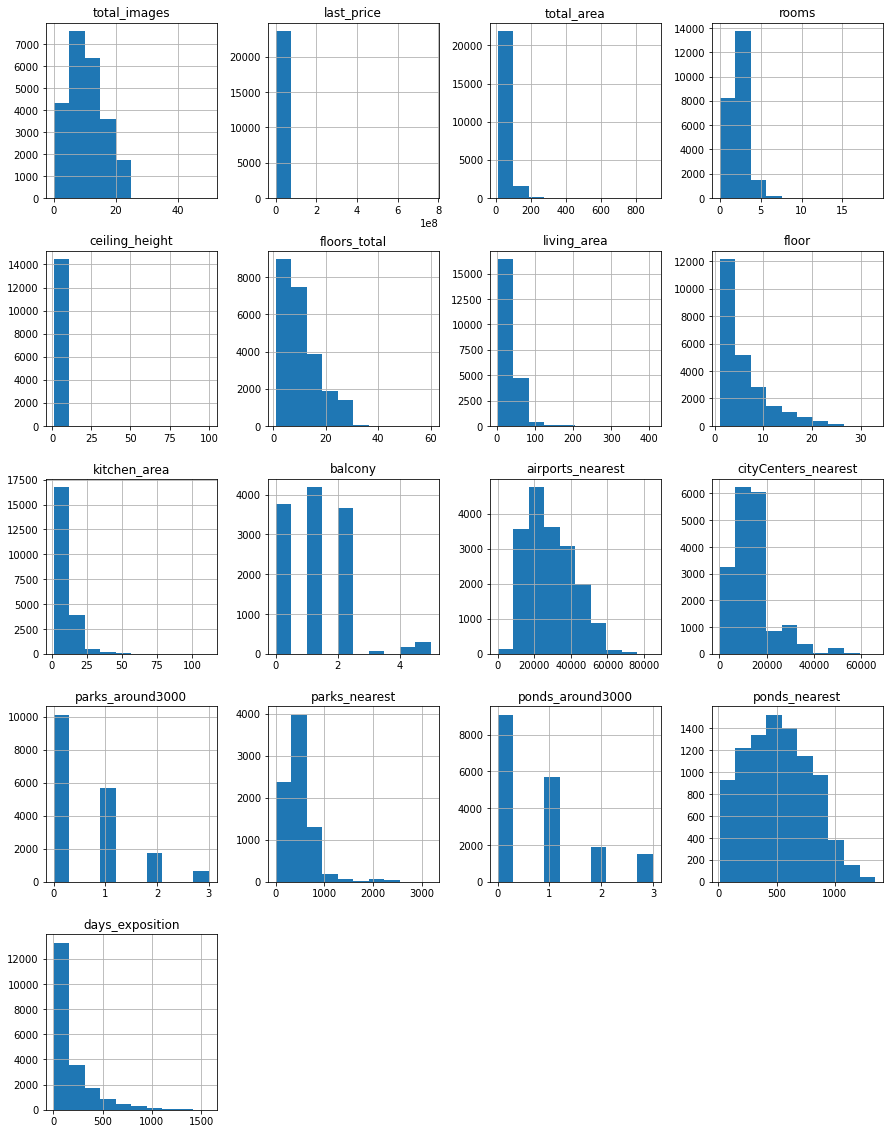

In [3]:
df.hist(figsize=(15, 20))

В некоторых столбцах количество ненулевых значений не совпадает с общим количеством строк. Значит в тех столбцах есть пропуски в данных. 
В столбце 'first_day_exposition' нужно сменить тип с object на datetime.
Также для визуального кофморта можно сменить тип данных на int в столбцах: last_price, floors_total, balcony, days_exposition.
Также выделяется максимальная высота потолков в 100м и неявные дубликаты в названиях населенных пунктов.

## Предобработка данных

### Поиск пропущенных значений

In [4]:
# количество пропущеннных значений для каждого столбца
df.isna().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропусков в данных достаточно много. Большинство, вероятно, связано с тем что выложить обьявление можно заполнив не все данные о квартире. Также когда объявления выкладывают частные лица они не придают значение всем параметрам. 

* cityCenters_nearest      5519, parks_nearest           15620, ponds_nearest           14589 - Пропуски в картографических данных в таком количестве могут говорить о технической ошибке (если, конечно, известно местоположение квартиры). Возможно есть необходимость уточнить у заказчика. 
* balcony                 11519 - Вероятно наличие пропуска = отсутствие балкона. Так и заполним.
* is_apartment            20924 - Возможно пользователи не имеют представление что такое апартаменты и поэтому пропуски. с другой стороны данных очень мало чтобы делать какие-то выводы. Заполним отсутвующие значения False. Для красоты.
* days_exposition          3181, ceiling_height           9195, ponds_around3000         5518, parks_around3000         5518, locality_name              49, kitchen_area             2278, living_area              1903, floors_total               86 - Пропущенные значения которые нельзя восстановить не исказив данные - заполним заранее принятым значением -1(чтобы в исследовании не включать пропущенные значения) или unknown. 

### Заполнение пропусков и корректировка типа данных

In [5]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['last_price'] = df['last_price'].astype('int')
df['balcony'] = df['balcony'].fillna(0).astype('int')
df['is_apartment'] = df['is_apartment'].fillna(False)
df['floors_total'] = df['floors_total'].fillna(df['floor']).astype('int')
df['floor'] = df['floor'].astype('int')

living_area_fillna = (df['total_area'].median() / df['living_area'].median())
df['living_area'] = df['living_area'].fillna((df['total_area'] / living_area_fillna)).astype('int')

kitchen_area_fillna = (df['total_area'].median() / df['kitchen_area'].median())
df['kitchen_area'] = df['kitchen_area'].fillna((df['total_area'] / kitchen_area_fillna)).astype('int')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  int64         
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  int64         
 13  balcony         

In [7]:
# проверим наличие пропусков
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Поиск и устранение неявных дубликатов

In [8]:
# проверяем количество уникальных знаений в столбце 'locality_name'
display(len(df['locality_name'].unique()))
# устраняем неявные дубликаты
df['locality_name'] = df['locality_name'].str.replace('поселок','посёлок')
df['locality_name'] = df['locality_name'].str.replace('посёлок городского типа','посёлок')
df['locality_name'] = df['locality_name'].str.replace('городской посёлок','посёлок')
df['locality_name'] = df['locality_name'].str.replace('коттеджный посёлок','посёлок')
df['locality_name'] = df['locality_name'].str.replace('садовое товарищество Приладожский','посёлок Приладожский')
# проверяем количество уникальных значений после удаления неявных дубликатов
display(len(df['locality_name'].unique()))

365

321

Количество неявных дубликатов уменьшилось

### Поиск и устранение аномалий

Вероятно в некоторых случаях при указании высоты потолков пропустили точку между цифрами и получилось аномальное значение. Сделаем так чтобы все значения выше 14(Может быть там большой спортзал) были разделены на 10 и проверим результат.

In [9]:
# задаем максимальное знаяение
max_ceiling_height = 14
# задаем условие
ceiling_high = df.ceiling_height > max_ceiling_height
# корректировка значений
df.loc[ceiling_high, 'ceiling_height'] = df.loc[ceiling_high, 'ceiling_height'] / 10 

## Посчитаем и добавим в таблицу новые столбцы

Столбцы для добавления:
* price_m2 — цена одного квадратного метра;
* weekday_exposition — день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* month_exposition — месяц публикации объявления;
* year_exposition — год публикации объявления;
* floor_type — тип этажа квартиры (значения — «‎первый», «последний», «другой»);
* cityCenters_nearest_km — расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)

In [10]:
# цена одного квадратного метра
df['price_m2'] = df['last_price'] / df['total_area']

# день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday

# месяц публикации объявления
df['month_exposition'] = df['first_day_exposition'].dt.month

# год публикации объявления
df['year_exposition'] = df['first_day_exposition'].dt.year

# функция для определения типа этажа квартиры (значения — «первый», «последний», «другой»)

def floor_type(flo):
    try:
        if flo['floor'] == flo['floors_total']:
            return 'последний'
        elif flo['floor'] == 1:
            return 'первый'
        else: 
            return 'другой'
    except:
        pass    
# применение функции
df['floor_type'] = df.apply(floor_type, axis=1)

# расстояние до центра города в целых километрах
df['cityCenters_nearest_km'] = (df['cityCenters_nearest'] * 0.001)

df['last_price_mil'] = df['last_price'] / 1000000 # для удобного отображения цены в млн

In [11]:
# посмотреть таблицу с фильтром
df.query('last_price_mil < 20 and 2.2 < ceiling_height < 4 and total_area < 200')
# применить фильтр к дальнейшим действиям
df = df.query('last_price_mil < 20 and 2.2 < ceiling_height < 4 and total_area < 200')

## Исследовательский анализ данных

### Изучение параметров объектов

count    13901.000000
mean        57.425950
std         23.885285
min         12.000000
25%         40.500000
50%         52.000000
75%         68.400000
max        197.200000
Name: total_area, dtype: float64

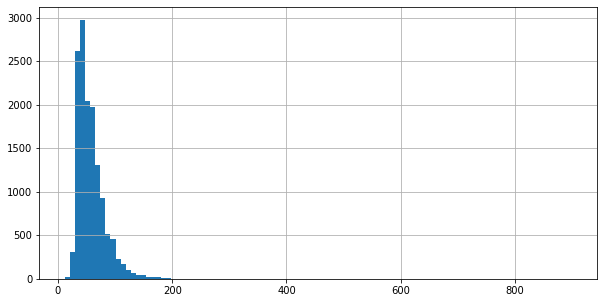

In [12]:
# total_area
df['total_area'].hist(bins=100, grid=True, figsize=(10,5), range=(12,900))
df['total_area'].describe()

Средняя площадь квартир составляет 57м², медиана 52м², минимальная площадь квартиры 12м² и максимальная 197.

count    13901.000000
mean        32.974390
std         16.204322
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        150.000000
Name: living_area, dtype: float64

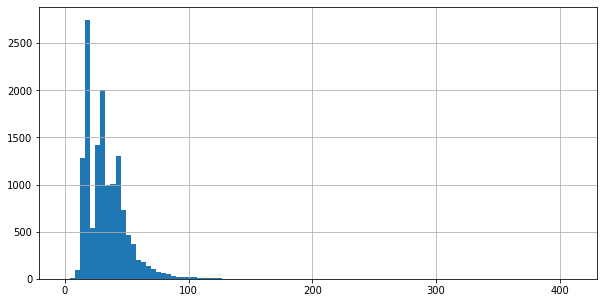

In [13]:
# living_area
df['living_area'].hist(bins=100, grid=True, figsize=(10,5), range=(0,410))
df['living_area'].describe()

Гистограмма жилой площади похожа на гистограмму общей площади. Вероятно есть зависимость между этими параметрами.

count    13901.000000
mean         9.721747
std          4.803399
min          1.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         64.000000
Name: kitchen_area, dtype: float64

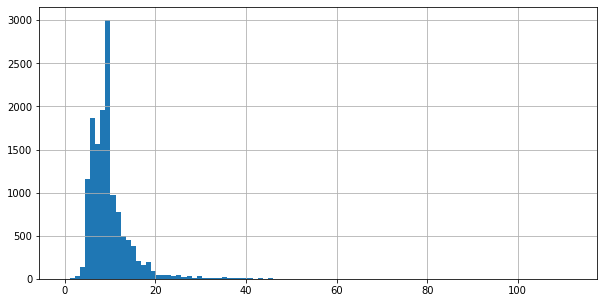

In [14]:
# kitchen_area
df['kitchen_area'].hist(bins=100, grid=True, figsize=(10,5), range=(0,112))
df['kitchen_area'].describe()

Гистограмма площади кухни на гистограмму жилой и общей площади. Вероятно есть зависимость между этими параметрами.

count    13901.000000
mean         5.592140
std          3.215514
min          0.012190
25%          3.500000
50%          4.750000
75%          6.700000
max         19.999000
Name: last_price_mil, dtype: float64

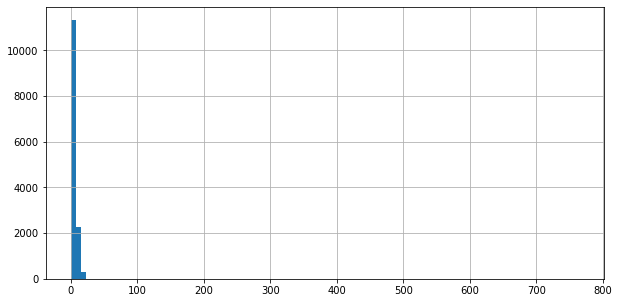

In [15]:
# last_price
df['last_price_mil'].hist(bins=100, grid=True, figsize=(10,5), range=(0,763))
df['last_price_mil'].describe()

Средняя цена квартиры 5.6млн, медиана 4.75млн.

count    13901.000000
mean         2.059564
std          0.978351
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

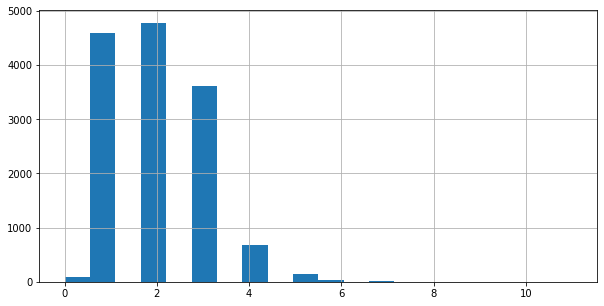

In [16]:
# rooms
df['rooms'].hist(bins=20, grid=True, figsize=(10,5))
df['rooms'].describe()

Наиболее часто квартиры с одной, двумя и тремя комнатами.

count    13901.000000
mean         2.703230
std          0.234303
min          2.250000
25%          2.500000
50%          2.650000
75%          2.800000
max          3.980000
Name: ceiling_height, dtype: float64

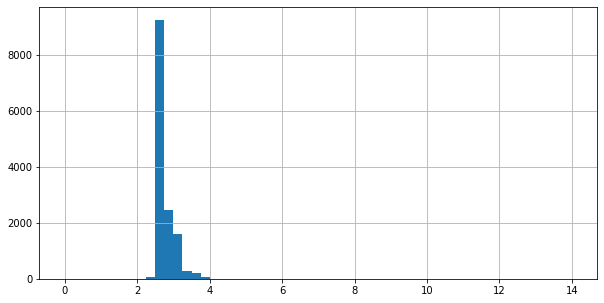

In [17]:
# ceiling_height
df['ceiling_height'].hist(bins=56, grid=True, figsize=(10,5), range=(0,14))
df['ceiling_height'].describe()

Средняя высота потолка 2.7м.

count    13901.000000
mean         5.628156
std          4.627576
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: floor, dtype: float64

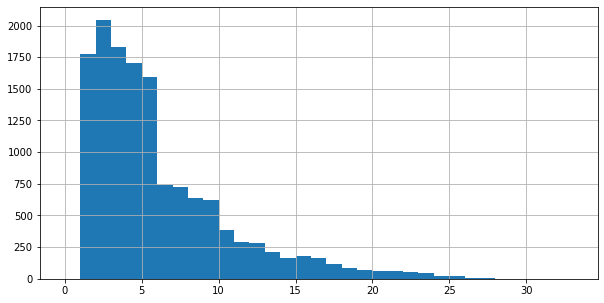

In [18]:
# floor
df['floor'].hist(bins=33, grid=True, figsize=(10,5), range=(0,33))
df['floor'].describe()

count      13901
unique         3
top       другой
freq       10152
Name: floor_type, dtype: object

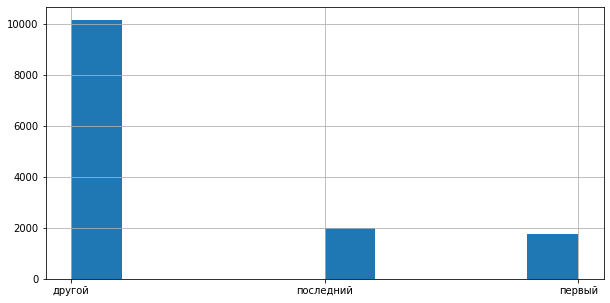

In [19]:
# floor_type
df['floor_type'].hist(bins=10, grid=True, figsize=(10,5))
df['floor_type'].describe()

Общее количество квартир на первом и последнем этажах не превышает количество квартир на других этажах. Что логично.

count    13901.000000
mean        10.255090
std          6.230497
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         60.000000
Name: floors_total, dtype: float64

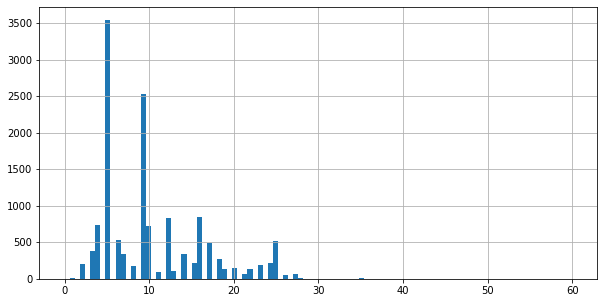

In [20]:
# floors_total
df['floors_total'].hist(bins=100, grid=True, figsize=(10,5), range=(0,60))
df['floors_total'].describe()

Можно отследить по гистограмме этажность жилого фонда: 5 и 9 этажных домов достаточно много.

count    10986.000000
mean     14446.661660
std       8715.230037
min        208.000000
25%       9784.750000
50%      13212.500000
75%      16174.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

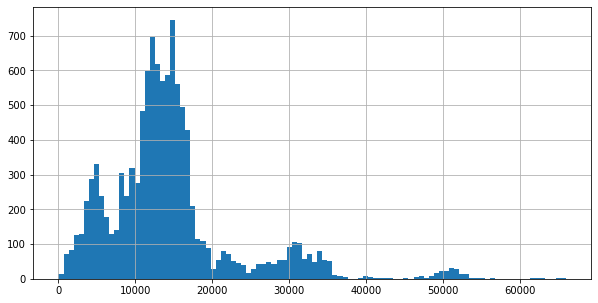

In [21]:
# cityCenters_nearest
df['cityCenters_nearest'].hist(bins=100, grid=True, figsize=(10,5), range=(0,66000))
df['cityCenters_nearest'].describe()

Основная масса квартир находится примерно в 11-17км от центра города.

count    10972.000000
mean     28899.480405
std      12815.625325
min          0.000000
25%      18318.500000
50%      26908.500000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64

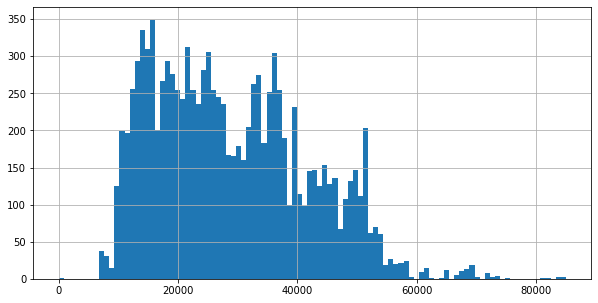

In [22]:
# airports_nearest
df['airports_nearest'].hist(bins=100, grid=True, figsize=(10,5), range=(0,85000))
df['airports_nearest'].describe()

Ближе 5км к аэропорту квартир мало. большое количество на расстоянии от 5 до 40км.

count    4878.000000
mean      479.083846
std       317.834080
min         3.000000
25%       288.000000
50%       455.000000
75%       604.000000
max      3190.000000
Name: parks_nearest, dtype: float64

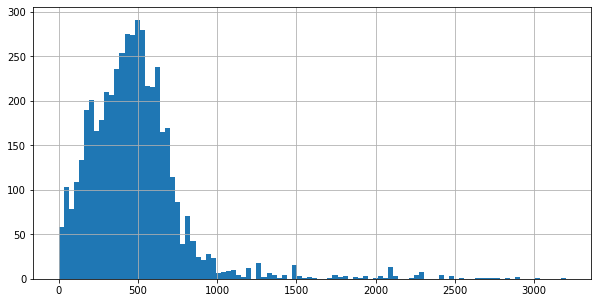

In [23]:
# parks_nearest
df['parks_nearest'].hist(bins=100, grid=True, figsize=(10,5), range=(0,3200))
df['parks_nearest'].describe()

Парки в пешей доступности до 800м что удобно.

count    13901.000000
mean         2.505144
std          1.792568
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          6.000000
Name: weekday_exposition, dtype: float64

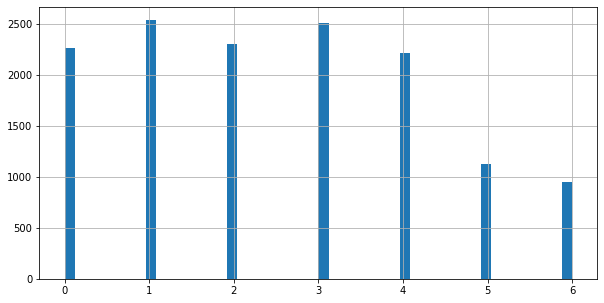

In [24]:
# weekday_exposition
df['weekday_exposition'].hist(bins=50, grid=True, figsize=(10,5))
df['weekday_exposition'].describe()

В выходные меньше всего публикаций объявлений.

count    13901.000000
mean         6.319905
std          3.498102
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

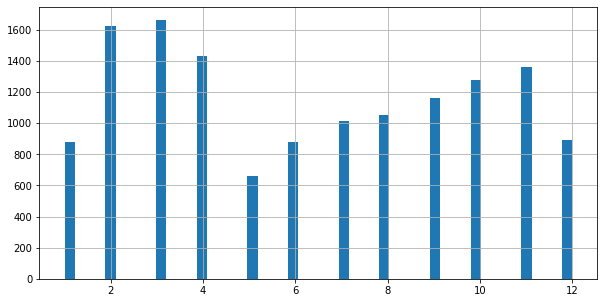

In [25]:
# month_exposition
df['month_exposition'].hist(bins=50, grid=True, figsize=(10,5))
df['month_exposition'].describe()

Январь, Май и Декабрь по публикациям сильно отстают от других месяцев. Думаю связано с количеством выходных дней.

### Как быстро продавались квартиры

count    11625.000000
mean       186.561290
std        225.214718
min          1.000000
25%         45.000000
50%        101.000000
75%        239.000000
max       1580.000000
Name: days_exposition, dtype: float64

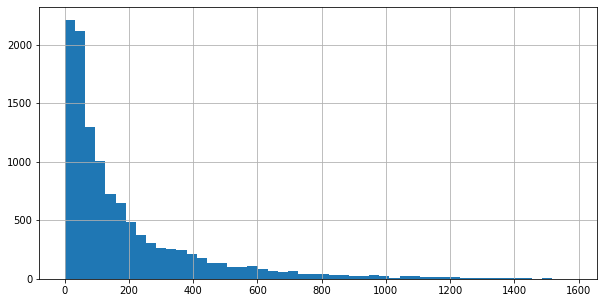

In [26]:
# days_exposition
df['days_exposition'].hist(bins=50, grid=True, figsize=(10,5), range=(0,1580))
df['days_exposition'].describe()

Много квартир продается в первые 60 дней после публикации и чем свежее обьявление тем больше вероятность продажи. Возможно это связано с тайм-аутом размещения объявлений на сайте.

### Какие факторы больше всего влияют на стоимость объекта?

0.7786459910794734

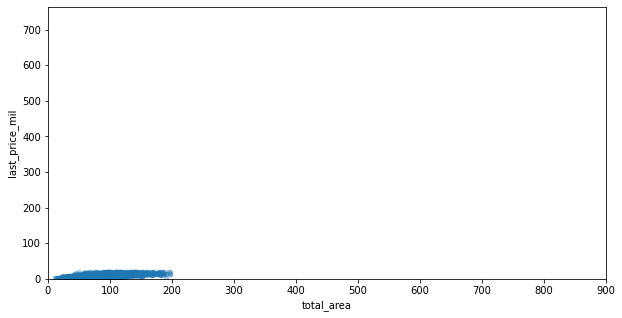

In [27]:
df.plot(x='total_area', y='last_price_mil', kind='scatter',figsize=(10,5), alpha=0.3, xlim=(0,900), ylim=(0,763))
df['total_area'].corr(df['last_price_mil']) # коэффициент корреляции Пирсона

Коэффициент корреляции Пирсона 0.65. Есть связь между общей площадью и ценой квартры.

0.6657012614194767

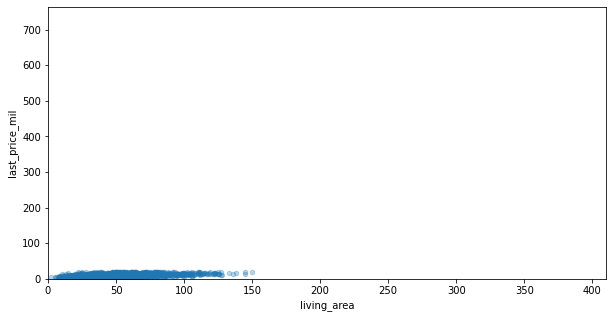

In [28]:
df.plot(x='living_area', y='last_price_mil', kind='scatter',figsize=(10,5), alpha=0.3, xlim=(0,410), ylim=(0,763))
df['living_area'].corr(df['last_price_mil'])

Коэффициент корреляции Пирсона 0.48. Зависимость цены от жилой площади еще есть но уже меньше чем на примере выше.

0.5919305540934691

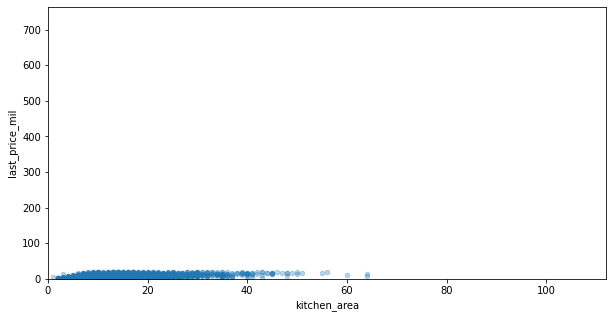

In [29]:
df.plot(x='kitchen_area', y='last_price_mil', kind='scatter',figsize=(10,5), alpha=0.3,  xlim=(0,112), ylim=(0,763))
df['kitchen_area'].corr(df['last_price_mil'])

Коэффициент корреляции Пирсона 0.37. Часть площади квартиры уменьшается как и связь между параметрами. Вероятно больше коррелируют площадь общая, жилая и кухни между собой.

0.5041695870828365

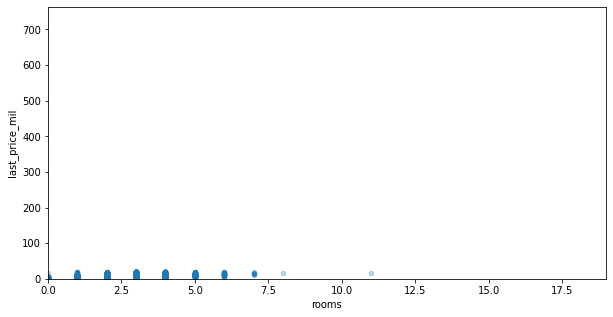

In [30]:
df.plot(x='rooms', y='last_price_mil', kind='scatter',figsize=(10,5), alpha=0.3, xlim=(0,19), ylim=(0,763))
df['rooms'].corr(df['last_price_mil'])

Количество комнат влияет на стоимость при количестве до 5, дальше влияние пропадает.

,count,mean,median
floor_type,,,
другой,10152,5.823697,4.9375
первый,1764,4.532445,4.0000
последний,1985,5.349594,4.4000


<AxesSubplot:xlabel='floor_type'>

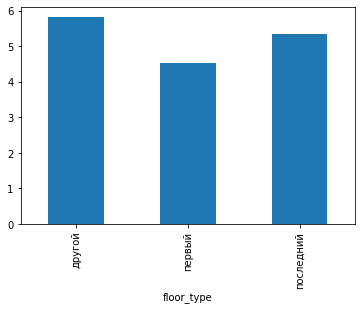

In [31]:
display(df.groupby('floor_type')['last_price_mil'].agg(['count','mean', 'median']))
df.groupby('floor_type')['last_price_mil'].mean().plot(x='floor_type', y='last_price_mil', kind='bar')

Квартиры на первом этаже дешевле остальных. 

,count,mean,median
weekday_exposition,,,
0,2267,5.576252,4.75
1,2538,5.762685,4.90
2,2300,5.616963,4.75
3,2511,5.642120,4.70
4,2217,5.511784,4.65
5,1123,5.377438,4.60
6,945,5.422664,4.60


<AxesSubplot:xlabel='weekday_exposition'>

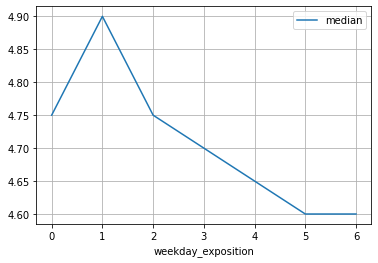

In [32]:
display(df.groupby('weekday_exposition')['last_price_mil'].agg(['count','mean', 'median']))
df.groupby('weekday_exposition')['last_price_mil'].agg(['count','mean', 'median']).plot(y='median', grid=True)

В выходные цена ниже - возможно связано с малым количеством объявлений в эти дни.

,count,mean,median
month_exposition,,,
1,881,5.645999,4.8000
2,1622,5.601204,4.8435
3,1664,5.409269,4.6500
4,1433,5.738577,4.9000
5,663,5.594713,4.7000
6,879,5.350349,4.5000
7,1013,5.716532,4.7750
8,1055,5.654767,4.7500
9,1165,5.693559,4.7500


<AxesSubplot:xlabel='month_exposition'>

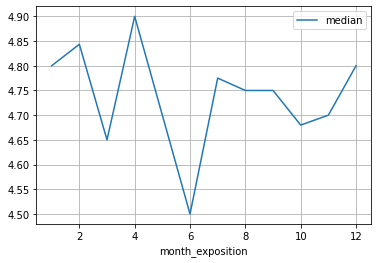

In [33]:
display(df.groupby('month_exposition')['last_price_mil'].agg(['count','mean', 'median']))
df.groupby('month_exposition')['last_price_mil'].agg(['count','mean', 'median']).plot(y='median', grid=True)

В месяцы с большим количеством выходных цена ниже.

,count,mean,median
year_exposition,,,
2014,67,8.383559,7.47656
2015,550,6.232952,5.31250
2016,1310,5.674189,4.75000
2017,4239,5.552518,4.60000
2018,5618,5.416056,4.65000
2019,2117,5.833162,5.10000


<AxesSubplot:xlabel='year_exposition'>

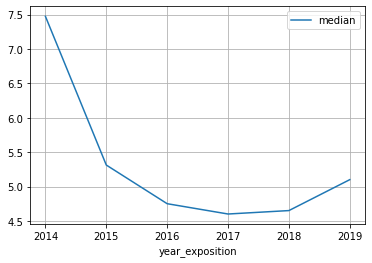

In [34]:
display(df.groupby('year_exposition')['last_price_mil'].agg(['count','mean', 'median']))
df.groupby('year_exposition')['last_price_mil'].agg(['count','mean', 'median']).plot(y='median', grid=True)

С 2015 по 2019 рынок недвижимости был не в лучшем состоянии.

### Найдем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [35]:
df.groupby('locality_name')['price_m2'].agg(['count','mean']).sort_values('count', ascending = False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,9542,109266.690983
Всеволожск,269,67274.917291
Пушкин,227,101744.814837
посёлок Шушары,217,79538.627641
посёлок Мурино,214,87138.590997
Колпино,203,75938.525561
Гатчина,148,70111.692053
Петергоф,142,85031.294804
посёлок Парголово,137,90901.351145


В культурной столице ожидаемо высокие цены за квадратный метр недвижимости. В ближайших населенных пунктах цена тоже достаточнго высока.

###  Найдем среднюю цену каждого километра удаления от центра города

<AxesSubplot:xlabel='cityCenters_nearest_km'>

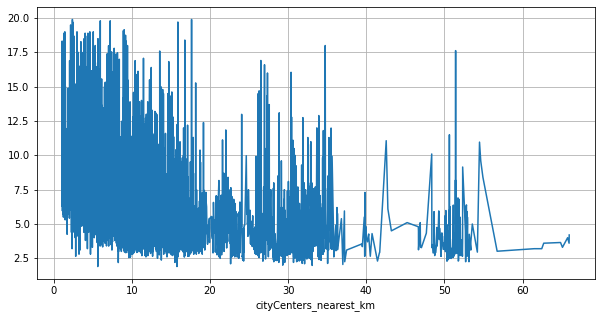

In [36]:
df.query('cityCenters_nearest_km >=1').groupby('cityCenters_nearest_km')['last_price_mil'].agg('mean').plot(y='mean', grid=True ,figsize=(10,5))

Чем ближе к центру города тем дороже квартиры. Остальные пики обусловлены престижностью и удаленностью населенного пункта от города.

## Общий вывод

В данной работе мы изучили исходные данные, выполнили предобработку данных в которую входило: поиск и заполнение пропущенных значений, корректировка типов данных, поиск и устранение неявных дубликатов и аномалий.
В ходе исследования данных были обнаружены интересные закономерности: самые непопулярные дни для публикации объявлений это выходные и праздничные дни. Также цена на квартиры получается сравнительно ниже. На первом этаже квартиры немного дешевле. С увеличением комнат до 5 цена растёт, а далее не всё однозначно. с 2015 по 2019 была сильная просадка в ценах на недвижимость. Цена на квартиры растет с приближением к центру города. Лучшим раскладом в тех условиях было бы выложить объявление во вторник в апреле.